In [2]:
# Loading necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [3]:
# Loading CSVs to variables
State_df = pd.read_csv("data/State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
rental_df = pd.read_csv('data/Metro_zori_uc_sfrcondomfr_sm_month.csv')


# Zillow Home Values Index (ZHVI)

In [4]:
del State_df['StateName']
State_df = State_df.loc[State_df["RegionName"].isin(["Texas", "California", "Florida", "Pennsylvania", "New York"])]
column_start = 4
columm_end = 220
State_df.drop(State_df.columns[column_start:columm_end], axis= 1, inplace= True)
State_df

,RegionID,SizeRank,RegionName,RegionType,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,9,0,California,state,491858.110459,497298.408138,502257.614153,506336.687832,510068.671902,513106.423962,...,700645.417980,700071.790442,702993.413576,708109.782990,715006.691673,722810.830530,730268.503111,736332.486797,740671.921245,743434.729197
1,54,1,Texas,state,190853.792103,191839.197281,192993.433201,194073.381008,195199.660072,196055.002434,...,293015.813177,292651.823251,292966.319007,293782.318512,294517.200523,295087.477528,295124.789296,294898.327140,294417.715350,293824.060476
2,14,2,Florida,state,219544.257012,220771.032095,222005.073060,223228.058910,224496.444069,225564.899728,...,378905.178430,379344.093513,380382.617962,382034.246422,383713.911859,385378.442796,386536.027985,387584.884146,388504.505535,389325.245410
3,43,3,New York,state,312968.619343,314079.786906,315527.420718,317146.005162,319500.961683,321626.169376,...,430860.488993,432344.784056,434774.062081,437629.211834,440656.724847,443733.624198,446344.733234,448195.711473,449741.470945,451434.182956
4,47,4,Pennsylvania,state,171604.239805,172309.541572,173286.086102,174213.676170,174950.437899,175314.388299,...,243504.365704,244306.951388,245814.703016,247602.348582,249341.677802,251008.430940,252308.868444,253189.352626,253718.399927,254151.927536


# Zillow Observed Rent Index (ZORI)

In [5]:
conditions = ['2015-','2016-','2017-','RegionID','SizeRank','RegionType']
to_drop = rental_df.columns[rental_df.columns.str.contains('|'.join(conditions))]
rental_df_filtered = rental_df.loc[rental_df["StateName"].isin(["TX", "CA", "FL", "PA", "NY"])]
rental_df_filtered = rental_df_filtered.drop(columns=to_drop)
rental_df_filtered

,RegionName,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
1,"New York, NY",NY,2441.337827,2448.402209,2461.286766,2481.573326,2499.704855,2517.481585,2529.569964,2538.462032,...,3048.279317,3083.461047,3122.358850,3158.258686,3181.961464,3190.587265,3189.132743,3173.037996,3150.806602,3132.049652
2,"Los Angeles, CA",CA,2166.510408,2177.260092,2188.630177,2199.502531,2208.542089,2220.133360,2229.969997,2238.980620,...,2822.067602,2837.442789,2844.700862,2855.432098,2868.402216,2880.681567,2884.888133,2881.923174,2868.529586,2858.240835
4,"Dallas, TX",TX,1285.875682,1292.382479,1300.367338,1307.680514,1312.387701,1320.421301,1324.381921,1326.670272,...,1764.604262,1769.302745,1776.777795,1784.825318,1793.402761,1795.131755,1791.183665,1783.781237,1777.050882,1768.792067
5,"Houston, TX",TX,1327.947037,1333.725325,1334.305522,1342.002130,1344.064508,1350.160187,1350.053837,1349.234250,...,1638.255261,1644.021405,1653.855104,1663.647065,1671.065141,1672.371522,1670.027797,1664.604969,1659.339327,1657.888554
7,"Philadelphia, PA",PA,1361.291210,1369.327937,1379.475960,1389.147640,1397.176212,1401.230068,1402.494886,1401.506303,...,1750.648128,1757.967031,1768.688606,1774.617896,1783.468860,1792.140087,1804.543373,1811.564338,1812.540628,1808.097494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,"Lewisburg, PA",PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1697.500000
533,"Stephenville, TX",TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1072.884795,1129.106572,1166.978024,1289.139982,1287.951987,1267.127041,1196.401351,1171.086144,1192.977248,1205.444444
543,"Lock Haven, PA",PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,832.994367,910.960699,852.858679,865.381132,882.028560,903.704173,886.265862,878.333333
551,"Bay City, TX",TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,919.120359,970.000000


In [6]:
# Transposing and reformatting the table
rental_reindexed = rental_df_filtered.set_index(rental_df_filtered['RegionName']).drop(columns=['RegionName', 'StateName'])
rental_transposed = rental_reindexed.T
rental_transposed = rental_transposed.reset_index()
rental_transposed.rename(columns = {'index':'Date'}, inplace=True)
rental_transposed['Date'] = pd.to_datetime(rental_transposed['Date'])
rental_transposed.columns.names = ['']
rental_transposed

,Date,"New York, NY","Los Angeles, CA","Dallas, TX","Houston, TX","Philadelphia, PA","Miami, FL","San Francisco, CA","Riverside, CA","San Diego, CA",...,"Oneonta, NY","Sonora, CA","Kerrville, TX","Corsicana, TX","Cortland, NY","Lewisburg, PA","Stephenville, TX","Lock Haven, PA","Bay City, TX","Bonham, TX"
0,2018-01-31,2441.337827,2166.510408,1285.875682,1327.947037,1361.291210,1657.014993,2715.050455,1596.189289,2009.627602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02-28,2448.402209,2177.260092,1292.382479,1333.725325,1369.327937,1660.177347,2730.128916,1603.620661,2021.927507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-03-31,2461.286766,2188.630177,1300.367338,1334.305522,1379.475960,1664.697646,2741.655261,1615.879843,2036.776795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-04-30,2481.573326,2199.502531,1307.680514,1342.002130,1389.147640,1669.003734,2757.754975,1626.532610,2049.249181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-31,2499.704855,2208.542089,1312.387701,1344.064508,1397.176212,1673.055674,2774.200810,1634.901665,2065.586737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2023-08-31,3190.587265,2880.681567,1795.131755,1672.371522,1792.140087,2691.615507,3046.243660,2474.781461,3047.643621,...,1169.907244,NaN,1701.201904,1356.169437,1243.540614,NaN,1267.127041,865.381132,NaN,NaN
68,2023-09-30,3189.132743,2884.888133,1791.183665,1670.027797,1804.543373,2695.493960,3035.265830,2476.100371,3044.229178,...,1199.628887,NaN,1691.103158,1361.454379,1192.760955,NaN,1196.401351,882.028560,NaN,NaN
69,2023-10-31,3173.037996,2881.923174,1783.781237,1664.604969,1811.564338,2705.471817,3021.474352,2491.537139,3030.226094,...,1219.641945,NaN,1665.101530,1382.491385,1172.362816,NaN,1171.086144,903.704173,NaN,NaN
70,2023-11-30,3150.806602,2868.529586,1777.050882,1659.339327,1812.540628,2710.570325,2997.640229,2490.885331,3006.703141,...,1163.140161,1604.796174,1684.023190,1368.947315,1171.796298,NaN,1192.977248,886.265862,919.120359,NaN


In [7]:
# Define variables to loop/append
partials = ['CA', 'TX', 'FL', 'NY', 'PA']
years = ['2018', '2019', '2020', '2021', '2022', '2023']
state_avgs = [] #Final list to create DataFrame
monthly_trend = []

# Filter data through each year
for year in years:
    yearly_df = rental_transposed[rental_transposed['Date'].dt.year.astype(str).str.contains(year)]
    monthly_avg = []
    yearly_avg = [] # Used to store state averages within next loop
    
    # Filter data through each state
    for partial in partials:
        # Filter columns that partially match the specified string
        matching_columns = yearly_df.filter(like=partial, axis=1)
        
        # Taking the average monthly across the state
        row_average = matching_columns.mean(axis=1)

        # Average the matching columns altogether to comprise of the entire state
        state_average = matching_columns.sum().mean()

        # Append the calculated values in the list
        monthly_avg.append(row_average)
        yearly_avg.append(state_average)
    monthly_trend.append(monthly_avg)
    state_avgs.append(yearly_avg)

# Create and display the DataFrame
yearly_state_avgs = pd.DataFrame(state_avgs, columns = partials, index = years)
monthly_trend_df = pd.DataFrame(monthly_trend)
# yearly_state_avgs = yearly_state_avgs.applymap('${:,.2f}'.format) # This is to apply dollar denominations to the DataFrame (It is kept noted off to allow graphing)
yearly_state_avgs

,CA,TX,FL,NY,PA
2018,15644.983730,8414.748759,13465.209524,8159.261574,5796.515738
2019,16320.963404,9203.672234,14345.240742,9785.349694,6192.849309
2020,16630.930619,9338.625172,15000.620526,9855.812757,6529.668482
2021,18620.398043,9972.528884,17098.101977,11040.058482,7997.472032
2022,23994.864123,11761.548898,21338.220639,13587.252487,9771.455187
2023,26429.536398,14771.992086,23432.175989,16913.750307,12105.145115


In [8]:
state_averages = yearly_state_avgs.T
state_averages = state_averages.reset_index()
state_averages.rename(columns = {'index':'State'}, inplace=True)
state_averages.to_csv('State_Average_Rental_Rate_By_Year.csv', index=False)
state_averages

,State,2018,2019,2020,2021,2022,2023
0,CA,15644.983730,16320.963404,16630.930619,18620.398043,23994.864123,26429.536398
1,TX,8414.748759,9203.672234,9338.625172,9972.528884,11761.548898,14771.992086
2,FL,13465.209524,14345.240742,15000.620526,17098.101977,21338.220639,23432.175989
3,NY,8159.261574,9785.349694,9855.812757,11040.058482,13587.252487,16913.750307
4,PA,5796.515738,6192.849309,6529.668482,7997.472032,9771.455187,12105.145115


In [9]:
monthly_df = pd.DataFrame(index=partials)
monthly_df = monthly_df.T

for i in range(6):
    loop_df = pd.DataFrame(monthly_trend[i], index=partials)
    loop_df = loop_df.T
    monthly_df = pd.concat([monthly_df, loop_df], axis=0)
monthly_df = monthly_df.set_index(rental_transposed['Date'])
monthly_df

,CA,TX,FL,NY,PA
Date,,,,,
2018-01-31,1785.043690,1054.835999,1253.735611,1187.562002,947.865290
2018-02-28,1795.046851,1059.110876,1259.311315,1191.770025,954.816762
2018-03-31,1806.310734,1063.550689,1262.566159,1195.395859,973.986759
2018-04-30,1822.358466,1067.325411,1268.245721,1164.146591,951.517665
2018-05-31,1833.560461,1074.280486,1276.801137,1169.891738,956.268861
...,...,...,...,...,...
2023-08-31,2333.770908,1373.615962,2002.327476,1579.825803,1211.036826
2023-09-30,2340.421866,1371.992855,2027.014059,1592.209068,1215.840122
2023-10-31,2341.457521,1358.999551,2023.591567,1553.872016,1216.920518


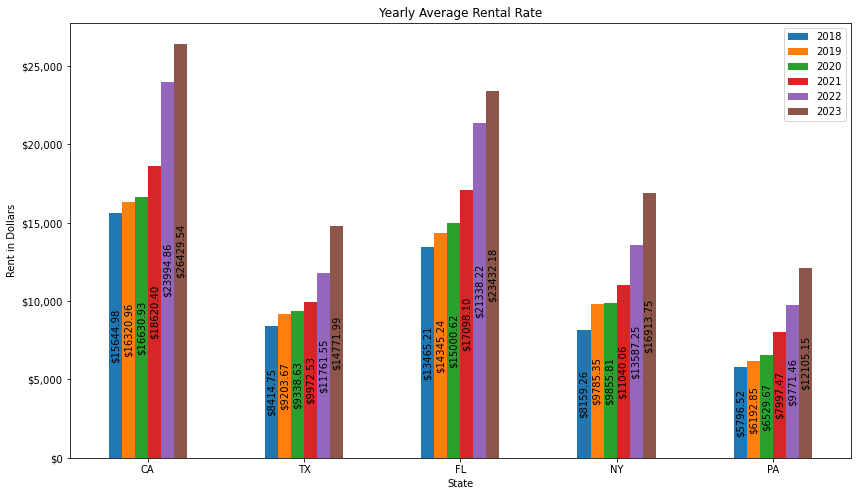

In [11]:
to_graph = yearly_state_avgs.T
year_graph = to_graph.plot.bar(figsize = (14,8), rot=0, title='Yearly Average Rental Rate',
                           ylabel='Rent in Dollars', xlabel='State')

# year_graph.bar_label(year_graph.containers[0], fmt='%d', label_type='edge', fontsize=10)

def label_formatter(x, pos):
    return "${:,.0f}".format(x)

# Apply the formatter to the y-axis ticks
year_graph.yaxis.set_major_formatter(FuncFormatter(label_formatter))

for container in year_graph.containers:
    year_graph.bar_label(container, fmt='$%.2f', label_type='center', fontsize=10, color='black',
                          rotation=90)

plt.savefig('output/Yearly_Average_Rentals', transparent=False, facecolor='white')

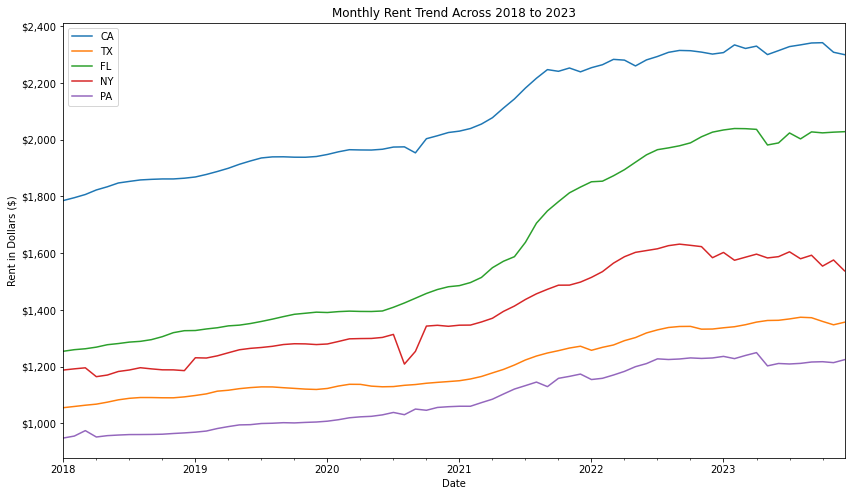

In [12]:
monthly_graph = monthly_df.plot.line(figsize = (14,8), title='Monthly Rent Trend Across 2018 to 2023', ylabel='Rent in Dollars ($)')

monthly_graph.yaxis.set_major_formatter(FuncFormatter(label_formatter))
plt.savefig('output/Monthly_Rental_Trend', transparent=False, facecolor='white')